In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import galah_li_rich_selection
import getpass
import mpl_scatter_density
from matplotlib.colors import LogNorm
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import h5py
import os
import pandas as pd
username = getpass.getuser()

%config InlineBackend.figure_format = 'retina'

In [2]:
galah_idr3, galah_idr3_position = galah_li_rich_selection.load_table(f"/Users/{username}/ownCloud/unique_GALAH_iDR3_1912_with_RC_Clusters.fits")

galah_idr3_DataFrame = pd.DataFrame(galah_idr3)

In [3]:
(ignore_stars_idx, good_spec_idx,
 giant_idx, li_measured_idx, li_rich_idx) = galah_li_rich_selection.create_selections(galah_idr3, galah_idr3_position)

useful_stars_idx = ~ignore_stars_idx & good_spec_idx
useful_giants_idx = useful_stars_idx & giant_idx
useful_li_giants_idx = useful_giants_idx & li_measured_idx
useful_li_rich_giants_idx = useful_li_giants_idx & li_rich_idx
useful_super_li_rich_giants_idx = useful_li_giants_idx & (galah_idr3['a_li'] > 2.7)

/Users/jeffrey/ownCloud/Projects/2019/li_rich giants/code/galah_li_rich_selection.py:50: RuntimeWarning: invalid value encountered in greater
  li_rich_idx = galah_idr3['a_li'] > li_cut
/Users/jeffrey/ownCloud/Projects/2019/li_rich giants/code/galah_li_rich_selection.py:38: RuntimeWarning: invalid value encountered in less
  return ((table['pmra'] - pmra_0)**2 + (table['pmdec'] - pmdec_0)**2)**0.5 < cut
/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [4]:
super_li = 2.7
total_size = 567122
useful_stars_idx = ~ignore_stars_idx & good_spec_idx
useful_giants_idx = useful_stars_idx & giant_idx
useful_li_giants_idx = useful_giants_idx & li_measured_idx
useful_li_rich_giants_idx = useful_li_giants_idx & li_rich_idx
useful_super_li_rich_giants_idx = useful_li_giants_idx & (galah_idr3['a_li'] > super_li)
# good_spec_not_ignored = ~ignore_stars_idx & good_spec_idx
# giant_good_spec_not_ignored = good_spec_not_ignored & giant_idx
# li_giant_good_spec_not_ignored = li_measured_idx & giant_good_spec_not_ignored
# li_rich_count = li_rich_idx & li_giant_good_spec_not_ignored
# super_li_rich_count = (galah_idr3['a_li'] > super_li) & li_giant_good_spec_not_ignored
k2_fields = (galah_idr3['field_id'] > 6540) & (galah_idr3['field_id']< 6831)
tess_fields = (galah_idr3['field_id'] > 7080) & (galah_idr3['field_id']< 7364)

print(f"This retained {100*np.sum(useful_stars_idx)/total_size:0.1f} per cent ({np.sum(useful_stars_idx)}/{total_size}) of the sample.")
# 
print(f"{100*np.sum(useful_giants_idx)/np.sum(useful_stars_idx):0.1f} per cent ({np.sum(useful_giants_idx)}/{np.sum(useful_stars_idx)}) of our sample of ``good'' stars were identified as giant stars.")

print(f"Of these {np.sum(useful_giants_idx)} giant stars, only {np.sum(useful_li_giants_idx)} ({100*np.sum(useful_li_giants_idx)/np.sum(useful_giants_idx):0.1f} per cent) had a measured \\ali. ")

print(f"Our red giant data set contains {np.sum(useful_li_rich_giants_idx)}/{np.sum(useful_giants_idx)} ({np.sum(useful_li_rich_giants_idx)/np.sum(useful_giants_idx)*100:0.1f} per cent) stars with $\\ali> 1.5$")

print(f"Of those, {np.sum(useful_super_li_rich_giants_idx)} stars lie above the primordial value (WMAP reference?) of $\\ali> {super_li}$")

print(f"If we consider just the K2-HERMES fields: {np.sum(k2_fields & useful_giants_idx)}/{np.sum(k2_fields & useful_li_rich_giants_idx)}/{np.sum(k2_fields & useful_super_li_rich_giants_idx)}")
print(f"If we consider just the TESS-HERMES fields: {np.sum(tess_fields & useful_giants_idx)}/{np.sum(tess_fields & useful_li_rich_giants_idx)}/{np.sum(tess_fields & useful_super_li_rich_giants_idx)}")



This retained 75.2 per cent (426541/567122) of the sample.
31.0 per cent (132076/426541) of our sample of ``good'' stars were identified as giant stars.
Of these 132076 giant stars, only 13237 (10.0 per cent) had a measured \ali. 
Our red giant data set contains 1551/132076 (1.2 per cent) stars with $\ali> 1.5$
Of those, 392 stars lie above the primordial value (WMAP reference?) of $\ali> 2.7$
If we consider just the K2-HERMES fields: 20077/239/59
If we consider just the TESS-HERMES fields: 7329/84/20


/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [5]:
star_list = [160519003601146,
             160517000101393,
             160522004101048,
             170531003801318,
             170517001801119,
             151110004201355]

for li_star_count, sobject_id in enumerate(star_list):
    star_of_interest_idx = (galah_idr3['sobject_id'] == sobject_id) & useful_giants_idx
    star = galah_idr3[star_of_interest_idx][0]
    row_str = ""
    row_str += f"{star['source_id']} & "
#     row_str += f"{star['star_id']} & "
    row_str += f"${star['ra']:0.3f}$ & "
    row_str += f"${star['dec']:0.3f}$ & "
    row_str += f"${star['rv_guess']:0.2f}\pm{star['e_rv_guess']:0.2f}$ & "
    row_str += f"${star['teff']:0.0f}\pm{star['e_teff']:0.0f}$ & "
    row_str += f"${star['logg']:0.2f}\pm{star['e_logg']:0.2f}$ & "
    row_str += f"${star['fe_h']:0.2f}\pm{star['e_fe_h']:0.2f}$ & "
    row_str += f"${star['a_li']:0.2f}\pm{star['e_a_li']:0.2f}$"
    row_str += "\\\\"
    print(row_str)

6137526858900209920 & $199.020$ & $-41.767$ & $-24.29\pm0.05$ & $3970\pm64$ & $1.63\pm0.15$ & $-0.17\pm0.06$ & $2.25\pm0.04$\\
5371899834025124608 & $175.501$ & $-48.171$ & $1.18\pm0.07$ & $4285\pm106$ & $1.75\pm0.16$ & $-0.22\pm0.14$ & $2.21\pm0.17$\\
6100901881763791232 & $223.933$ & $-42.034$ & $-18.09\pm0.10$ & $4429\pm67$ & $2.01\pm0.61$ & $-0.18\pm0.07$ & $2.40\pm0.06$\\
6235140814020759808 & $236.883$ & $-25.259$ & $-23.51\pm0.05$ & $4681\pm90$ & $2.31\pm0.16$ & $-0.18\pm0.10$ & $2.25\pm0.13$\\
6129493448995721984 & $180.111$ & $-50.437$ & $-49.77\pm0.11$ & $4980\pm66$ & $2.55\pm0.15$ & $-0.21\pm0.07$ & $2.25\pm0.06$\\
3155263089390175872 & $109.992$ & $9.198$ & $38.29\pm0.12$ & $5147\pm88$ & $2.72\pm0.16$ & $-0.18\pm0.10$ & $2.29\pm0.13$\\


426541


/Users/jeffreysimpson/anaconda3/envs/snowflakes/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:74: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/jeffreysimpson/anaconda3/envs/snowflakes/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:79: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


132076


/Users/jeffreysimpson/anaconda3/envs/snowflakes/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:74: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/jeffreysimpson/anaconda3/envs/snowflakes/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:79: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


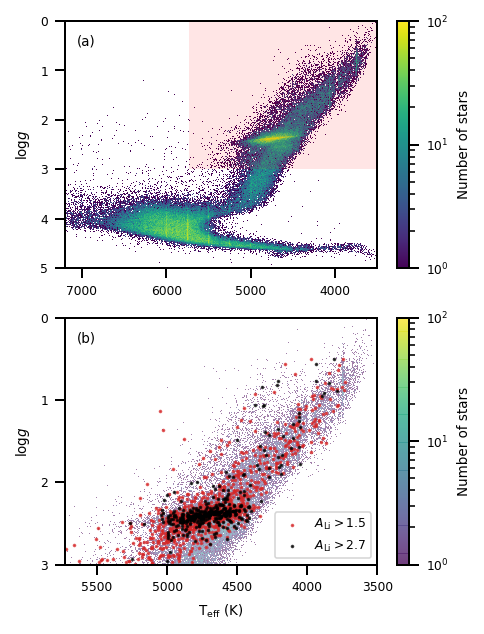

In [168]:
sns.set_context("paper", font_scale=0.7)
fig = plt.figure(figsize=(3.5, 5.0))
ax = fig.add_subplot(2, 1, 1, projection='scatter_density')
print(len(galah_idr3['teff'][useful_stars_idx]))
cmd = ax.scatter_density(galah_idr3['teff'][useful_stars_idx],
                         galah_idr3['logg'][useful_stars_idx],
                         dpi=300, 
                         cmap=plt.cm.viridis, label='__nolabel__',
                         norm=LogNorm(vmin=1, vmax=100))
plt.sca(ax)
plt.fill([3000,3000,5730,5730],
         [-1,3,3,-1],
         'r', alpha=0.1, edgecolor=None)
cbar = fig.colorbar(cmd)
cbar.set_label("Number of stars")

# ax.get_xaxis().set_ticklabels([])
ax.set_ylim(5,0)
ax.set_xticks(np.arange(4000,7500,1000))
ax.set_xlim(7200, 3500)
ax.set_ylabel(r"$\log g$")
ax.annotate('(a)', xy=(0.04,0.9), xycoords='axes fraction')

ax = fig.add_subplot(2, 1, 2, projection='scatter_density')
print(len(galah_idr3['teff'][useful_giants_idx]))
cmd = ax.scatter_density(galah_idr3['teff'][useful_giants_idx],
                         galah_idr3['logg'][useful_giants_idx],
                         dpi=300, 
                         cmap=plt.cm.viridis, alpha=0.5, label='__nolabel__',
                         norm=LogNorm(vmin=1, vmax=100))
plt.sca(ax)
ax.scatter(galah_idr3['teff'][useful_li_rich_giants_idx & ~useful_super_li_rich_giants_idx],
           galah_idr3['logg'][useful_li_rich_giants_idx & ~useful_super_li_rich_giants_idx],
           s=1, alpha=0.7, c='C3', label='$A_\mathrm{Li} > 1.5$')
ax.scatter(galah_idr3['teff'][useful_super_li_rich_giants_idx],
           galah_idr3['logg'][useful_super_li_rich_giants_idx],
           s=1, alpha=0.7, c='k', label='$A_\mathrm{Li} > 2.7$')
cbar = fig.colorbar(cmd)
cbar.set_label("Number of stars")
ax.legend(loc='lower right')
ax.annotate('(b)', xy=(0.04,0.9), xycoords='axes fraction')
ax.set_yticks(np.arange(0,3.1,1))
ax.set_ylim(3, 0)
ax.set_xlim(5730,3500)
ax.set_xlabel(r"$\mathrm{T}_\mathrm{eff}$ (K)")
ax.set_ylabel(r"$\log g$")

fig.savefig('../paper/figures/teff_logg.pdf', bbox_inches='tight', dpi=500)
plt.show()

In [7]:
RC_Stello = galah_idr3['RC_Stello'] == 1
RGB_Stello = galah_idr3['RC_Stello'] == 0
RC_sharma_seismic = galah_idr3['RC_sharma_seismic'] > 0.5
RGB_sharma_seismic = (galah_idr3['RC_sharma_seismic'] <= 0.5) & (galah_idr3['RC_sharma_seismic'] > -1)
RC_sharma_spec = (galah_idr3['RC_sharma_spec'] > 0.5)
RGB_sharma_spec = (galah_idr3['RC_sharma_spec'] <= 0.5) & (galah_idr3['RC_sharma_spec'] > -1)

print(np.sum(useful_giants_idx & RC_Stello),
      np.sum(useful_giants_idx & RGB_Stello),
      np.sum(useful_giants_idx & RGB_Stello)+np.sum(useful_giants_idx & RC_Stello))

492 1096 1588


In [8]:
print(np.sum(useful_giants_idx & RC_sharma_seismic),
      np.sum(useful_giants_idx & RGB_sharma_seismic),
      np.sum(useful_giants_idx & RGB_sharma_seismic)+np.sum(useful_giants_idx & RC_sharma_seismic))

print(r"""\begin{table}
\begin{tabular}{llll}
\hline""")
RC_right = np.sum(useful_giants_idx & RC_Stello & RC_sharma_seismic)
RC_wrong = np.sum(useful_giants_idx & RC_Stello & RGB_sharma_seismic)
RGB_right = np.sum(useful_giants_idx & RGB_Stello & RC_sharma_seismic)
RGB_wrong = np.sum(useful_giants_idx & RGB_Stello & RGB_sharma_seismic)
print(f" & RC (Sharma) & RGB (Sharma) & Total\\\\")
print(r"\hline")
print(f"RC (Hon+2020) & {RC_right} ({RC_right/(RC_right + RGB_right)*100:0.0f}\%; {RC_right/(RC_right + RC_wrong)*100:0.0f}\%) & {RC_wrong} ({RC_wrong/(RC_wrong + RGB_wrong)*100:0.0f}\%; {RC_wrong/(RC_right + RC_wrong)*100:0.0f}\%) & {RC_right + RC_wrong}\\\\")
print(f"RGB (Hon+2020) & {RGB_right} ({RGB_right/(RC_right + RGB_right)*100:0.0f}\%; {RGB_right/(RGB_right + RGB_wrong)*100:0.0f}\%) & {RGB_wrong} ({RGB_wrong/(RC_wrong + RGB_wrong)*100:0.0f}\%; {RGB_wrong/(RGB_right + RGB_wrong)*100:0.0f}\%) & {RGB_right + RGB_wrong}\\\\")
print(r"\hline")
print(f"Total & {RC_right + RGB_right} & {RC_wrong + RGB_wrong} & {RC_right + RC_wrong + RGB_right + RGB_wrong}\\\\")
print(r"\hline")
print(r"""\label{tab:rc_comparison_seismic}
\end{tabular}
\end{table}""")


# total_Stello_Sharma = (RC_Stello | RGB_Stello) & (RC_sharma_seismic | RGB_sharma_seismic)
# print(f"There are a total of {np.sum(total_Stello_Sharma)} stars with Stello and Sharma seismic classifications.")

1699 3159 4858
\begin{table}
\begin{tabular}{llll}
\hline
 & RC (Sharma) & RGB (Sharma) & Total\\
\hline
RC (Hon+2020) & 126 (63\%; 64\%) & 70 (10\%; 36\%) & 196\\
RGB (Hon+2020) & 73 (37\%; 10\%) & 648 (90\%; 90\%) & 721\\
\hline
Total & 199 & 718 & 917\\
\hline
\label{tab:rc_comparison_seismic}
\end{tabular}
\end{table}


In [9]:
print(np.sum(useful_giants_idx & RC_sharma_spec),
      np.sum(useful_giants_idx & RGB_sharma_spec),
      np.sum(useful_giants_idx & RGB_sharma_spec)+np.sum(useful_giants_idx & RC_sharma_spec))

print(r"""\begin{table}
\begin{tabular}{llll}
\hline""")
RC_right = np.sum(useful_giants_idx & RC_Stello & RC_sharma_spec)
RC_wrong = np.sum(useful_giants_idx & RC_Stello & RGB_sharma_spec)
RGB_right = np.sum(useful_giants_idx & RGB_Stello & RC_sharma_spec)
RGB_wrong = np.sum(useful_giants_idx & RGB_Stello & RGB_sharma_spec)
print(f" & RC (Sharma) & RGB (Sharma) & Total\\\\")
print(r"\hline")
print(f"RC (Hon+2020) & {RC_right} ({RC_right/(RC_right + RGB_right)*100:0.0f}\%; {RC_right/(RC_right + RC_wrong)*100:0.0f}\%) & {RC_wrong} ({RC_wrong/(RC_wrong + RGB_wrong)*100:0.0f}\%; {RC_wrong/(RC_right + RC_wrong)*100:0.0f}\%) & {RC_right + RC_wrong}\\\\")
print(f"RGB (Hon+2020) & {RGB_right} ({RGB_right/(RC_right + RGB_right)*100:0.0f}\%; {RGB_right/(RGB_right + RGB_wrong)*100:0.0f}\%) & {RGB_wrong} ({RGB_wrong/(RC_wrong + RGB_wrong)*100:0.0f}\%; {RGB_wrong/(RGB_right + RGB_wrong)*100:0.0f}\%) & {RGB_right + RGB_wrong}\\\\")
print(r"\hline")
print(f"Total & {RC_right + RGB_right} & {RC_wrong + RGB_wrong} & {RC_right + RC_wrong + RGB_right + RGB_wrong}\\\\")
print(r"\hline")
print(r"""\label{tab:rc_comparison_spec}
\end{tabular}
\end{table}""")


# total_Stello_Sharma = (RC_Stello | RGB_Stello) & (RC_sharma_seismic | RGB_sharma_seismic)
# print(f"There are a total of {np.sum(total_Stello_Sharma)} stars with Stello and Sharma seismic classifications.")

48154 81006 129160
\begin{table}
\begin{tabular}{llll}
\hline
 & RC (Sharma) & RGB (Sharma) & Total\\
\hline
RC (Hon+2020) & 279 (66\%; 64\%) & 154 (16\%; 36\%) & 433\\
RGB (Hon+2020) & 146 (34\%; 15\%) & 834 (84\%; 85\%) & 980\\
\hline
Total & 425 & 988 & 1413\\
\hline
\label{tab:rc_comparison_spec}
\end{tabular}
\end{table}


In [10]:
for rc_selection in [[RC_sharma_spec, RGB_sharma_spec], [RC_Stello, RGB_Stello]]:
    rc_idx, rgb_idx = rc_selection
    total_giant_stars = np.sum(useful_giants_idx & (rc_idx | rgb_idx))
    rc_all_stars = np.sum(useful_giants_idx & rc_idx)
    rgb_all_stars = np.sum(useful_giants_idx & rgb_idx)
    print(f"For our sample of {total_giant_stars} giants, {rc_all_stars} ({rc_all_stars/total_giant_stars*100:0.1f} per cent) are RC, and {rgb_all_stars} ({rgb_all_stars/total_giant_stars*100:0.1f} per cent) are RGB")

    total_giant_li_stars = np.sum(useful_li_rich_giants_idx & (rc_idx | rgb_idx))
    rc_li_stars = np.sum(useful_li_rich_giants_idx & rc_idx)
    rgb_li_stars = np.sum(useful_li_rich_giants_idx & rgb_idx)
    print(f"For our sample of {total_giant_li_stars} giants, {rc_li_stars} ({rc_li_stars/total_giant_li_stars*100:0.1f} per cent) are RC, and {rgb_li_stars} ({rgb_li_stars/total_giant_li_stars*100:0.1f} per cent) are RGB")

    print(f"RC {rc_li_stars}/{rc_all_stars} ({rc_li_stars/rc_all_stars*100:0.1f} per cent)")
    print(f"RGB {rgb_li_stars}/{rgb_all_stars} ({rgb_li_stars/rgb_all_stars*100:0.1f} per cent)")
    print("----")



For our sample of 129160 giants, 48154 (37.3 per cent) are RC, and 81006 (62.7 per cent) are RGB
For our sample of 1522 giants, 981 (64.5 per cent) are RC, and 541 (35.5 per cent) are RGB
RC 981/48154 (2.0 per cent)
RGB 541/81006 (0.7 per cent)
----
For our sample of 1588 giants, 492 (31.0 per cent) are RC, and 1096 (69.0 per cent) are RGB
For our sample of 10 giants, 6 (60.0 per cent) are RC, and 4 (40.0 per cent) are RGB
RC 6/492 (1.2 per cent)
RGB 4/1096 (0.4 per cent)
----


In [11]:
541/81006 * 100

0.6678517640668592

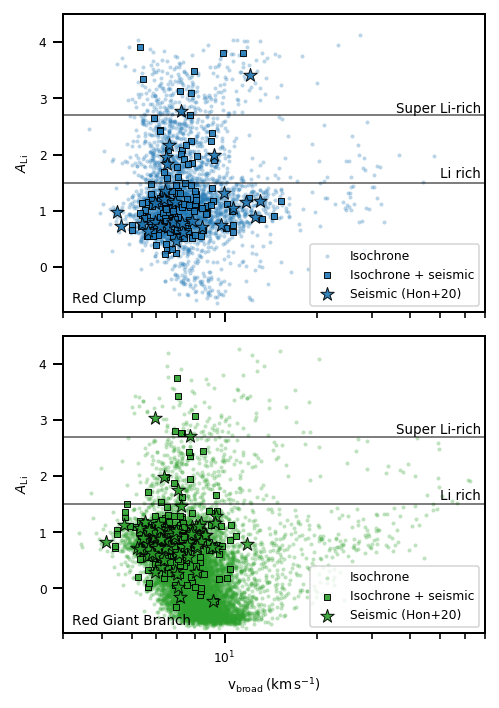

In [167]:
def rc_rgb_plot(xvalue, xlabel, xlims, log=False, loc='upper right', line_labels='right'):
    sns.set_context("paper", font_scale=0.7)
    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(3.5, 5.0),
                             sharey=True, sharex=True)

    colors = ['C0', 'C2']
    plot_lists = [[[RC_sharma_spec & ~(RC_Stello | RC_sharma_seismic), RGB_sharma_spec & ~(RGB_Stello | RGB_sharma_seismic)],
                   dict(s=4, lw=0, alpha = 0.3, label="Isochrone")],
                  [[RC_sharma_seismic & ~RC_Stello, RGB_sharma_seismic & ~RGB_Stello],
                   dict(s=10, marker='s', edgecolors='k', lw=0.5, alpha = 0.9, label="Isochrone + seismic")],
                  [[RC_Stello, RGB_Stello],
                   dict(s=50, marker='*', edgecolors='k', lw=0.5, alpha = 0.9, label="Seismic (Hon+20)")]]
    for plot_list in plot_lists:
        for idx_count, idx_select in enumerate(plot_list[0]):
            axes[idx_count].scatter(galah_idr3[xvalue][idx_select & useful_li_giants_idx],
                                    galah_idr3['a_li'][idx_select & useful_li_giants_idx],
                                    c = colors[idx_count],
                                    **plot_list[1])
    axes[0].set_xlim(xlims)
    axes[1].set_xlabel(xlabel)
    axes[0].set_ylim(-0.8, 4.5)
    
    [ax.set_ylabel(r"$A_\mathrm{Li}$") for ax in axes]
    [ax.legend(loc=loc) for ax in axes]
    if log:
        [ax.set_xscale('log') for ax in axes]
    [axes[ax_count].annotate(label,
                             xy=(0.02,0.03),
                             xycoords='axes fraction') for ax_count, label in enumerate(['Red Clump', 'Red Giant Branch'])]
    if line_labels == 'left':
        x_loc = 0.02
    else:
        x_loc = 0.99
    [ax.annotate(label[0],
                 xy=(x_loc,label[1]),
                 xycoords='axes fraction',
                 horizontalalignment=line_labels) for label in [['Li rich', 0.45],
                                                            ['Super Li-rich', 0.67]] for ax in axes]
    [ax.axhline(1.5, lw=1, alpha=0.5, c='k') for ax in axes]
    [ax.axhline(2.7, lw=1, alpha=0.5, c='k') for ax in axes]
            
    
    plt.tight_layout()
    fig.savefig(f'../paper/figures/{xvalue}_ali_rc_rgb.pdf', bbox_inches='tight', dpi=500)
    plt.show()
    
# rc_rgb_plot("logg", r"$\log g$", [3.1, 0.25])
# rc_rgb_plot("fe_h", "[Fe/H]", [-2.5, 0.5], loc='upper left', line_labels='left')
rc_rgb_plot("vbroad", r"$\mathrm{v}_\mathrm{broad}\,(\mathrm{km}\,\mathrm{s}^{-1})$", [3,70], loc='lower right', log=True)
# rc_rgb_plot("mass", "", [0.4,3.5])
# rc_rgb_plot("lbol", "", [10.,5000], log=True)
# rc_rgb_plot("age", "", [0.3,13])
# rc_rgb_plot("e_rv_gaia", "", [0.01,20], log=True)


/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal
/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less_equal


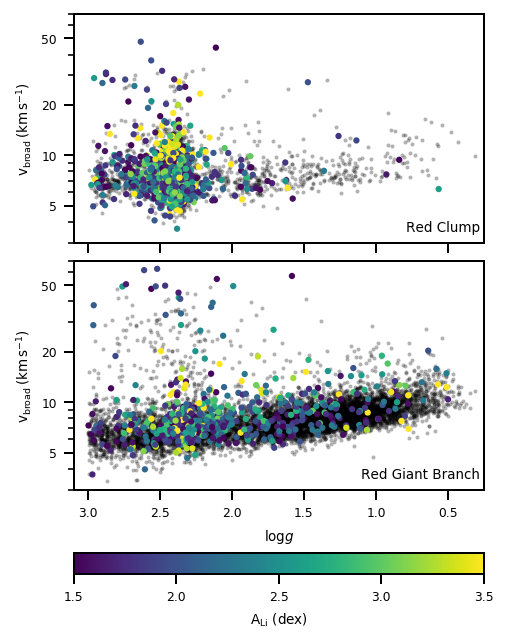

In [13]:
def rc_rgb_plot_2(xstuff, ystuff):
    xvalue, xlabel, xlims = xstuff
    yvalue, ylabel, ylims = ystuff
    sns.set_context("paper", font_scale=0.7)
    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(3.5, 5.0),
                             sharey=True, sharex=True)

    colors = ['C0', 'C2']
    plot_lists = [[[RC_sharma_spec, RGB_sharma_spec],
                   dict(s=4, lw=0, alpha = 0.3, label="Sharma+Spec")],
#                   [[RC_sharma_seismic, RGB_sharma_seismic],
#                    dict(s=10, marker='s', edgecolors='k', lw=0.5, alpha = 0.9, label="Sharma+Spec+Seismic")],
#                   [[RC_Stello, RGB_Stello],
#                    dict(s=50, marker='*', edgecolors='k', lw=0.5, alpha = 0.9, label="Hon+19")]
                 ]
    for plot_list in plot_lists:
        for idx_count, idx_select in enumerate(plot_list[0]):
            for li_idx in [galah_idr3['a_li'] <= 1.5,
                           galah_idr3['a_li'] > 1.5]:
                plot_idx = li_idx & idx_select & useful_li_giants_idx
                if np.sum(li_idx) == np.sum(galah_idr3['a_li'] <= 1.5):
                    kwargs = plot_list[1].copy()
                    kwargs['c'] = 'k'#colors[idx_count]
                else:
                    kwargs = plot_list[1].copy()
                    kwargs['c'] = galah_idr3['a_li'][plot_idx]
                    kwargs['s'] = np.max([kwargs['s'], 10])
                    kwargs['alpha'] = 1.0
                    kwargs['label']="__none__"
                    kwargs['zorder']= 1000
                    kwargs['vmin']= 1.5
                    kwargs['vmax']= 3.5
                    kwargs['zorder']= 1000
                li_points = axes[idx_count].scatter(galah_idr3[xvalue][plot_idx],
                                                    galah_idr3[yvalue][plot_idx],
                                                    **kwargs)
    axes[0].set_xlim(xlims)
    axes[0].set_ylim(ylims)
    axes[1].set_xlabel(xlabel)
    [ax.set_ylabel(ylabel) for ax in axes]
    
    [ax.set_yscale('log') for ax in axes]
#     [ax.legend() for ax in axes]
    [axes[ax_count].annotate(label,
                             xy=(0.99,0.05),
                             xycoords='axes fraction', horizontalalignment='right') for ax_count, label in enumerate(['Red Clump', 'Red Giant Branch'])]
    axes[1].set_yticks([5, 10, 20, 50])
    axes[1].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.tight_layout()
    cbar = fig.colorbar(li_points, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.1)
    cbar.set_label("$\mathrm{A}_\mathrm{Li}$ (dex)")
    cbar.set_ticks(np.arange(1.5, 3.6, 0.5))
    fig.savefig(f'../paper/figures/{xvalue}_{yvalue}_rc_rgb.pdf', bbox_inches='tight', dpi=500)
    plt.show()


rc_rgb_plot_2(["logg", r"$\log g$", [3.1, 0.25]],
              ['vbroad', r"$\mathrm{v}_\mathrm{broad}\,(\mathrm{km}\,\mathrm{s}^{-1})$", [3, 70]])

/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater
/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater


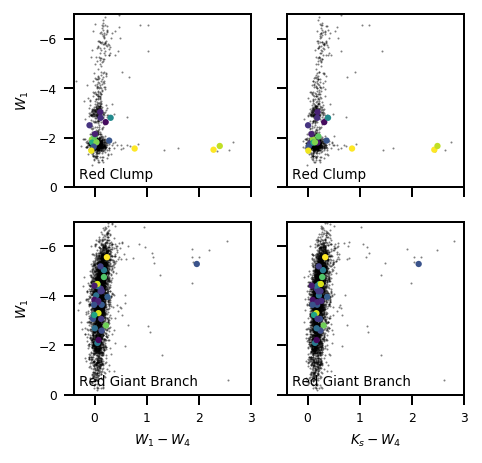

/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater
/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater


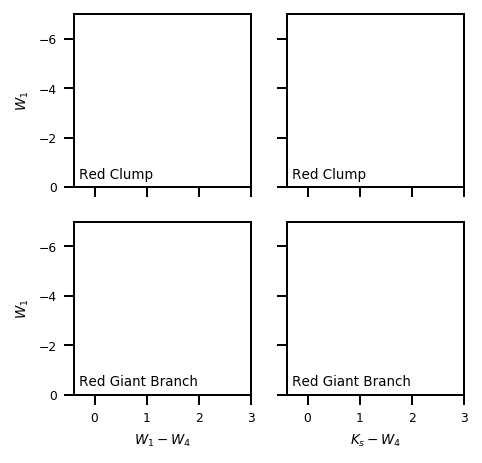

In [15]:
def get_values(value, dist=False):
    if len(value) == 1:
        if not dist:
            return galah_idr3[value[0]]
        else:
            return galah_idr3[value[0]]-(5*np.log10(galah_idr3['r_est'])-5)
    else:
        
        return galah_idr3[value[0]] - galah_idr3[value[1]]
    

def rc_rgb_plot_2(xstuff, ystuff, axes, dist=False):
    xvalue, xlabel, xlims = xstuff
    yvalue, ylabel, ylims = ystuff
    xvalue = get_values(xvalue)
    yvalue = get_values(yvalue, dist=dist)


    colors = ['C0', 'C2']
    plot_lists = [[[RC_sharma_spec, RGB_sharma_spec],
                   dict(s=1, lw=0, alpha = 0.5, label="Sharma+Spec")],
#                   [[RC_sharma_seismic, RGB_sharma_seismic],
#                    dict(s=10, marker='s', edgecolors='k', lw=0.5, alpha = 0.9, label="Sharma+Spec+Seismic")],
#                   [[RC_Stello, RGB_Stello],
#                    dict(s=50, marker='*', edgecolors='k', lw=0.5, alpha = 0.9, label="Hon+19")]
                 ]
    for plot_list in plot_lists:
        for idx_count, idx_select in enumerate(plot_list[0]):
            for li_idx in [galah_idr3['a_li'] > 1.5,
                           ~(galah_idr3['a_li'] > 1.5)]:
                plot_idx = (li_idx & idx_select & useful_giants_idx &
                            (galah_idr3['cc_flags'] == '0000') &
                            (galah_idr3['ph_qual'] == 'AAAA'))
                if np.sum(li_idx) == np.sum(~(galah_idr3['a_li'] > 1.5)):
                    kwargs = plot_list[1].copy()
                    kwargs['c'] = 'k'#colors[idx_count]
                else:
                    kwargs = plot_list[1].copy()
                    kwargs['c'] = galah_idr3['a_li'][plot_idx]
                    kwargs['s'] = np.max([kwargs['s'], 10])
                    kwargs['alpha'] = 1.0
                    kwargs['label']="__none__"
                    kwargs['zorder']= 1000
                    kwargs['vmin']= 1.5
                    kwargs['vmax']= 3.5
                axes[idx_count].scatter(xvalue[plot_idx],
                                        yvalue[plot_idx],
                                        **kwargs)
    axes[0].set_xlim(xlims)
    axes[0].set_ylim(ylims)
    axes[1].set_xlabel(xlabel)
#     [ax.set_ylabel(ylabel) for ax in axes]
    
#     [ax.set_yscale('log') for ax in axes]
#     [ax.legend() for ax in axes]
    [axes[ax_count].annotate(label,
                             xy=(0.03,0.05),
                             xycoords='axes fraction') for ax_count, label in enumerate(['Red Clump', 'Red Giant Branch'])]


sns.set_context("paper", font_scale=0.7)
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(3.5, 3.5),
                         sharey=True, sharex=True)
rc_rgb_plot_2([["w1mpro","w4mpro"], r"$W_1-W_4$", [-0.4, 3]],
              [["w1mpro",], r"$W_1$", [0, -7]], axes[:,0], dist=True)
rc_rgb_plot_2([["ks_m","w4mpro"], r"$K_s-W_4$", [-0.4, 3]],
              [["w1mpro",], r"$W_1$", [0, -7]], axes[:,1], dist=True)
[ax.set_ylabel(r"$W_1$") for ax in axes[:,0]]
[ax.set_yticks(np.arange(-6,1,2)) for ax in axes[:,0]]
plt.tight_layout
fig.savefig(f'../paper/figures/infrared_excess_rc_rgb.pdf', bbox_inches='tight', dpi=500)
plt.show()

sns.set_context("paper", font_scale=0.7)
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(3.5, 3.5),
                         sharey=True, sharex=True)
rc_rgb_plot_2([["w1mpro","w4mpro"], r"$W_1-W_4$", [-0.4, 3]],
              [["w1mpro",], r"$W_1$", [0, -7]], axes[:,0])
rc_rgb_plot_2([["ks_m","w4mpro"], r"$K_s-W_4$", [-0.4, 3]],
              [["w1mpro",], r"$W_1$", [0, -7]], axes[:,1])
[ax.set_ylabel(r"$W_1$") for ax in axes[:,0]]
[ax.set_yticks(np.arange(-6,1,2)) for ax in axes[:,0]]
plt.tight_layout
fig.savefig(f'../paper/figures/infrared_excess_rc_rgb.pdf', bbox_inches='tight', dpi=500)
plt.show()

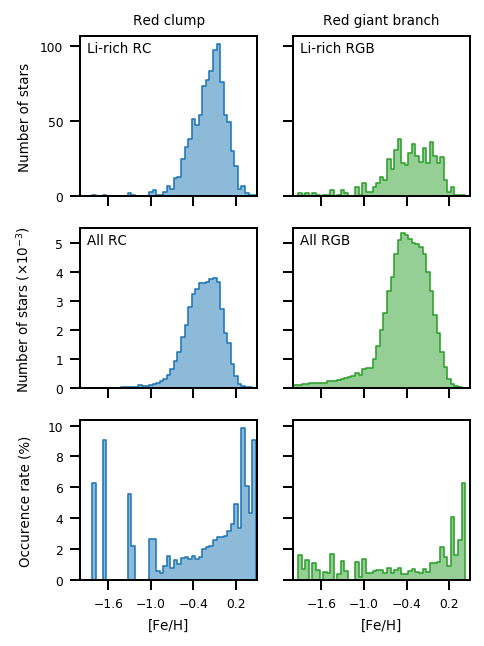

In [16]:
sns.set_context("paper", font_scale=0.7)
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(3.5, 5.0),
                         sharey='row', sharex=True)

bins = np.arange(-2.1, 0.7, 0.05)
colours = ['C0', 'C2']

def both_type_bars(x, y, ax, yerr=None):
    ax.step(x+(bins[1]-bins[0])/2, y, colours[col_num], lw=0.8)
    ax.bar(x, y, yerr=yerr, width = bins[1]-bins[0], **kwargs)
    

for col_num, sample_idx in enumerate([RC_sharma_spec, RGB_sharma_spec]):
    li_feh_counts, bin_edges = np.histogram(galah_idr3[sample_idx & useful_li_rich_giants_idx]['fe_h'], bins=bins)
    full_feh_counts, bin_edges = np.histogram(galah_idr3[sample_idx & useful_giants_idx]['fe_h'], bins=bins)
    kwargs = dict(alpha=0.5, lw=1.0, color=colours[col_num], edgecolor=None,
                  error_kw=dict(elinewidth=0.4, ecolor=colours[col_num]))
    ax = axes[:,col_num]
    both_type_bars(bin_edges[:-1], li_feh_counts, ax[0])
    both_type_bars(bin_edges[:-1], full_feh_counts/1000, ax[1])
    both_type_bars(bin_edges[:-1], 100*li_feh_counts/full_feh_counts, ax[2])


axes[1,0].set_yticks(np.arange(0,6,1))
axes[1,0].set_ylim([0, 5.5])

axes[0,0].set_yticks([0, 50, 100])
axes[0,0].set_xticks(np.arange(-1.6,+0.6, 0.6))
axes[0,0].set_xlim([-2., 0.5])

axes[0,0].set_ylabel('Number of stars')
axes[1,0].set_ylabel(r'Number of stars ($\times10^{-3}$)')
axes[2,0].set_ylabel('Occurence rate (%)')

[axes[0,ax_count].set_title(label) for ax_count, label in enumerate(['Red clump', 'Red giant branch'])]
[ax.set_xlabel('[Fe/H]') for ax in axes[-1,:]]

[ax.set_xlabel('[Fe/H]') for ax in axes[-1,:]]

for row_count, start_str in enumerate(['RC', 'RGB']):
    for col_count, full_str in enumerate([f'Li-rich {start_str}', f'All {start_str}']):
        axes[col_count,row_count].annotate(full_str, xy=(0.04,0.90), xycoords='axes fraction')
fig.align_labels()
fig.savefig(f'../paper/figures/feh_li_occurence.pdf', bbox_inches='tight', dpi=500)
plt.show()

/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:74: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/jeffrey/anaconda3/envs/snowflakes/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:79: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


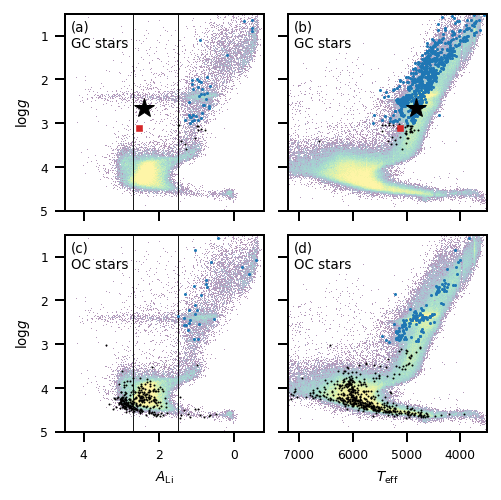

In [17]:
sns.set_context("paper", font_scale=0.7)

fig = plt.figure(figsize=(3.5, 3.5))
axes_gc = fig.add_subplot(2, 2, 1, projection='scatter_density')
axes_oc = fig.add_subplot(2, 2, 3, projection='scatter_density')
axes_gc_kiel = fig.add_subplot(2, 2, 2, projection='scatter_density')
axes_oc_kiel = fig.add_subplot(2, 2, 4, projection='scatter_density')

label_list = ["(a)\nGC stars", "(b)\nGC stars", "(c)\nOC stars",  "(d)\nOC stars"]
for ax_count, ax in enumerate([axes_gc, axes_gc_kiel, axes_oc, axes_oc_kiel]):
    ax.annotate(label_list[ax_count], (0.03, 0.83), xycoords='axes fraction')
for ax_count, ax in enumerate([axes_gc, axes_oc]):
    cmd = ax.scatter_density(galah_idr3['A_Li'][useful_stars_idx & li_measured_idx],
                             galah_idr3['logg'][useful_stars_idx & li_measured_idx],
                             dpi=200, alpha=0.4,
                             cmap=plt.cm.viridis, label='__nolabel__',
                             norm=LogNorm(vmin=1, vmax=50)
                            )
    
for ax_count, ax in enumerate([axes_gc_kiel, axes_oc_kiel]):
    cmd = ax.scatter_density(galah_idr3['teff'][useful_stars_idx],
                             galah_idr3['logg'][useful_stars_idx],
                             dpi=200, alpha=0.4,
                             cmap=plt.cm.viridis, label='__nolabel__',
                             norm=LogNorm(vmin=1, vmax=100)
                            )

kwargs = [dict(fmt='o', markersize=1, mew=0.0, elinewidth=0.1, c='k', label='All Cluster stars'),
          dict(fmt='o', markersize=1, mew=0.5, elinewidth=0.5, c='C0', label='All Cluster giant stars'),
          dict(fmt='*', markersize=10, mew=0.5, elinewidth=0.5, c='k', label='All Cluster Li giant stars'),
          dict(fmt='s', markersize=3, mew=0.3, elinewidth=0.5, c='C3', zorder=1000, label='Li-rich stars'),
         ]

globular_cluster_idx = [len(string)>0 for string in galah_idr3['GlobularCluster']]
open_cluster_idx = [len(string)>0 for string in galah_idr3['OpenCluster']]
for idx_count, idx in enumerate([useful_stars_idx & ~useful_giants_idx,
                                 useful_giants_idx & ~useful_li_rich_giants_idx,
                                 useful_li_rich_giants_idx,
                                 ~useful_li_rich_giants_idx & (galah_idr3['logg'] < 3.5) & (galah_idr3['teff'] < 6000) & li_rich_idx
                                ]):
    for ax_cluster_stuff in [[globular_cluster_idx, axes_gc, axes_gc_kiel],
                             [open_cluster_idx, axes_oc, axes_oc_kiel],]:
        cluster_idx, ax_li, ax_kiel = ax_cluster_stuff
        ax_li.errorbar((galah_idr3['A_Li'])[idx & cluster_idx],
                         (galah_idr3['logg'])[idx & cluster_idx],
#                          xerr=(galah_idr3['e_A_Li'])[idx & cluster_idx],
                         **kwargs[idx_count])
        ax_kiel.errorbar((galah_idr3['teff'])[idx & cluster_idx],
                              (galah_idr3['logg'])[idx & cluster_idx],
                              **kwargs[idx_count])
        
def sharex(ax_1, ax_2, limits, label):
    ax_1.get_shared_x_axes().join(ax_1, ax_2)
    ax_1.set_xlim(limits)
    ax_1.set_xticklabels([])
    ax_2.set_xlabel(label)
    
def sharey(ax_1, ax_2, limits, label):
    ax_1.get_shared_y_axes().join(ax_1, ax_2)
    ax_1.set_ylim(limits)
    ax_2.set_yticklabels([])
    ax_1.set_ylabel(label)

[ax.axvline(1.5, lw=0.45, c='k') for ax in [axes_oc, axes_gc]]
[ax.axvline(2.7, lw=0.45, c='k') for ax in [axes_oc, axes_gc]]

sharex(axes_gc, axes_oc, [4.5, -0.8], r'$A_\mathrm{Li}$')
sharex(axes_gc_kiel, axes_oc_kiel, [7200, 3500], r'$T_\mathrm{eff}$')
sharey(axes_gc, axes_gc_kiel, [5, 0.5], r'$\log g$')
sharey(axes_oc, axes_oc_kiel, [5, 0.5], r'$\log g$')


fig.tight_layout()
plt.savefig("../paper/figures/galah_gc_li.pdf", bbox_inches='tight', dpi=500)
plt.show()

In [18]:
gc_star_count = np.sum(globular_cluster_idx & useful_stars_idx)
giant_gc_star_count = np.sum(globular_cluster_idx & useful_giants_idx)
measured_gc_li_star_count = np.sum(globular_cluster_idx & li_measured_idx)
cluster_names = np.unique(galah_idr3[globular_cluster_idx]['GlobularCluster'])

print(f"We identified {gc_star_count} globular cluster stars across {len(cluster_names)} clusters.")
print(f"{measured_gc_li_star_count} globular cluster stars have a measured lithium ({measured_gc_li_star_count}/{giant_gc_star_count}; {measured_gc_li_star_count/giant_gc_star_count*100:0.0f} per cent)")

We identified 721 globular cluster stars across 12 clusters.
52 globular cluster stars have a measured lithium (52/676; 8 per cent)


In [19]:
for cluster in cluster_names:
    print(cluster, np.sum(galah_idr3['GlobularCluster']==cluster))

NGC 104 360
NGC 1851 9
NGC 288 37
NGC 362 38
NGC 4590 1
NGC 5139 221
NGC 5986 1
NGC 6362 10
NGC 6397 19
NGC 6541 1
NGC 6584 1
NGC 7099 23


In [20]:
oc_star_count = np.sum(open_cluster_idx & useful_stars_idx)
giant_oc_star_count = np.sum(open_cluster_idx & useful_giants_idx)
measured_oc_li_star_count = np.sum(open_cluster_idx & useful_li_giants_idx)
cluster_names = np.unique(galah_idr3[open_cluster_idx]['OpenCluster'])

print(f"We identified {oc_star_count} globular cluster stars across {len(cluster_names)} clusters.")
print(f"{measured_oc_li_star_count} globular cluster stars have a measured lithium ({measured_oc_li_star_count}/{giant_oc_star_count}; {measured_oc_li_star_count/giant_oc_star_count*100:0.0f} per cent)")

We identified 697 globular cluster stars across 40 clusters.
27 globular cluster stars have a measured lithium (27/139; 19 per cent)


In [21]:
for cluster in cluster_names:
    print(cluster, np.sum(galah_idr3['OpenCluster']==cluster))

ASCC_16 5
ASCC_21 3
ASCC_99 1
Alessi_24 5
Alessi_9 1
BH_99 2
Berkeley_32 12
Berkeley_33 1
Berkeley_73 5
Blanco_1 43
Collinder_135 6
Collinder_359 5
IC_2602 9
IC_4665 15
Mamajek_4 12
Melotte_101 1
Melotte_22 43
NGC_1647 1
NGC_1750 2
NGC_1817 26
NGC_1901 14
NGC_2112 31
NGC_2204 22
NGC_2215 1
NGC_2232 5
NGC_2243 5
NGC_2318 1
NGC_2516 34
NGC_2548 8
NGC_2632 65
NGC_2682 176
NGC_3680 2
NGC_5460 1
NGC_6253 39
Ruprecht_145 8
Ruprecht_147 54
Trumpler_20 22
Trumpler_26 1
Turner_5 1
UPK_612 9
